<a href="https://colab.research.google.com/github/ashraf-rsp/Compiler_construction_lab/blob/main/NLPFinalProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📌 Emotion Detection from Tweets with Emoji Mapping

---

## 👥 Team Members
- 🧑‍💻 **Ashrafur Rahman Shuvo** (`221010187`)
- 🧑‍💻 **Yousuf Talukdar Nahid** (`222010014`)
- 🧑‍💻 **Nazila Islam Nowrin** (`222010152`)

🎓 **CSE, 12th Batch**

---

## 🏫 Course Information
- 📘 **Course:** Compiler Construction  
- 👨‍🏫 **Instructor:** Reduanul Bari Shovon




###  Project Overview:
- **Dataset**: CSV file with two key columns:
  - `text`: Tweet content (string)
  - `label`: Integer from 0 to 5 representing emotions —  
    `0: sadness`, `1: joy`, `2: love`, `3: anger`, `4: fear`, `5: surprise`
- **Purpose**:
  1. Preprocess text (cleaning, stemming)
  2. Extract features using TF‑IDF
  3. Train a classifier (Logistic Regression)
  4. Evaluate with accuracy, confusion matrix, and classification report
  5. Map predicted label to corresponding emoji for human-friendly output
  ---

In [ ]:
# ✅ Install Kaggle CLI
!pip install kaggle

# ✅ Create the Kaggle directory and move the API key
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# ✅ Download the Emotions dataset from Kaggle
!kaggle datasets download -d nelgiriyewithana/emotions

In [2]:
# ✅ Unzip the dataset
!unzip emotions.zip -d ./emotions_data

Archive:  emotions.zip
  inflating: ./emotions_data/text.csv  


---

## ✅ **Step 2: Load and Explore the Dataset**

This step includes:

* Loading the CSV file using pandas
* Displaying the structure (columns, data types)
* Showing a few sample rows
* Checking for missing values
* Understanding label distribution

---

🔍 Step 3: Data Cleaning & Preprocessing (lowercasing, stopwords, stemming, etc.)



In [3]:
# Step 2: Load the dataset
import pandas as pd

# Load the CSV file
data = pd.read_csv('./emotions_data/text.csv')

# Show the shape of the dataset
print("Dataset Shape:", data.shape)

# Preview first 5 rows
data.head()

Dataset Shape: (416809, 3)


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


---

## 🧹 **Step 3: Data Cleaning & Preprocessing**

---


📊 **Step 4: Text Vectorization (TF-IDF)**
📂 **Step 5: Train-Test Split**
🤖 **Step 6: Model Training & Evaluation**



In [4]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [5]:
# Step 3.1: Drop unwanted column
# data.drop(columns=['Unnamed: 0'], inplace=True) # This line was removed as the column is not present

# Step 3.2: Initialize stemmer
ps = PorterStemmer()

In [6]:
# Step 3.3: Clean text function
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase and split
    text = text.lower().split()
    # Remove stopwords and apply stemming
    text = [ps.stem(word) for word in text if word not in stopwords.words('english')]
    return " ".join(text)

# Step 3.4: Apply cleaning to a subset of the data for testing
# We'll apply to the first 1000 rows for now
data_subset = data.head(1000).copy()
data_subset['clean_text'] = data_subset['text'].apply(clean_text)

# Preview cleaned text from the subset
data_subset[['text', 'clean_text', 'label']].head()

,text,clean_text,label
0,i just feel really helpless and heavy hearted,feel realli helpless heavi heart,4
1,ive enjoyed being able to slouch about relax a...,ive enjoy abl slouch relax unwind frankli need...,0
2,i gave up my internship with the dmrg and am f...,gave internship dmrg feel distraught,4
3,i dont know i feel so lost,dont know feel lost,0
4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughli weari job take...,4


In [7]:
# Step 4: Text Vectorization (TF-IDF)
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# We'll use a limited number of features for this example on the subset
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform the cleaned text data from the subset
X_subset = tfidf_vectorizer.fit_transform(data_subset['clean_text'])

print("Shape of TF-IDF features subset:", X_subset.shape)

Shape of TF-IDF features subset: (1000, 2427)


Shape of X_train_subset: (800, 2427)
Shape of X_test_subset: (200, 2427)
Shape of y_train_subset: (800,)
Shape of y_test_subset: (200,)


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Model Evaluation on Subset:
Accuracy: 0.5100

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.69      0.62        62
           1       0.47      0.81      0.60        70
           2       0.00      0.00      0.00        15
           3       0.50      0.04      0.07        26
           4       1.00      0.05      0.09        21
           5       0.00      0.00      0.00         6

    accuracy                           0.51       200
   macro avg       0.42      0.27      0.23       200
weighted avg       0.51      0.51      0.42       200



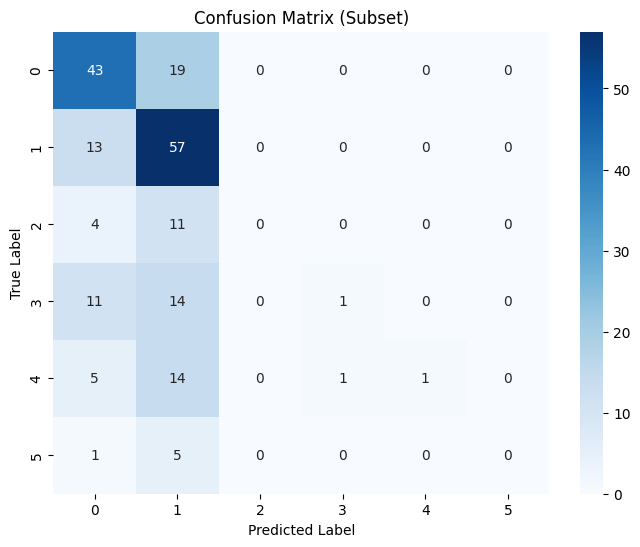

In [8]:
# Step 5: Train-Test Split
from sklearn.model_selection import train_test_split

# Split the data subset into training and testing sets
X_train_subset, X_test_subset, y_train_subset, y_test_subset = train_test_split(
    X_subset, data_subset['label'], test_size=0.2, random_state=42
)

print("Shape of X_train_subset:", X_train_subset.shape)
print("Shape of X_test_subset:", X_test_subset.shape)
print("Shape of y_train_subset:", y_train_subset.shape)
print("Shape of y_test_subset:", y_test_subset.shape)

# Step 6: Model Training & Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence
model.fit(X_train_subset, y_train_subset)

# Make predictions on the test set
y_pred_subset = model.predict(X_test_subset)

# Evaluate the model
accuracy = accuracy_score(y_test_subset, y_pred_subset)
report = classification_report(y_test_subset, y_pred_subset)
conf_matrix = confusion_matrix(y_test_subset, y_pred_subset)

print("\nModel Evaluation on Subset:")
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Subset)')
plt.show()

## Apply cleaning and preprocessing to full dataset


In [9]:
# Apply cleaning to the entire data
data['clean_text'] = data['text'].apply(clean_text)

# Preview the first 5 rows of the data with the new 'clean_text' column
data.head()

,Unnamed: 0,text,label,clean_text
0,0,i just feel really helpless and heavy hearted,4,feel realli helpless heavi heart
1,1,ive enjoyed being able to slouch about relax a...,0,ive enjoy abl slouch relax unwind frankli need...
2,2,i gave up my internship with the dmrg and am f...,4,gave internship dmrg feel distraught
3,3,i dont know i feel so lost,0,dont know feel lost
4,4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughli weari job take...


In [10]:
# Install spaCy
!pip install spacy

# Download a spaCy language model
# 'en_core_web_sm' is a small English model, good for basic tasks
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 84.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [11]:
import spacy
import re

# Load the spaCy English language model
# Disable unnecessary components for speed
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Define a function to clean and preprocess text using spaCy
def clean_text_spacy(text):
    # Remove special characters and numbers (similar to before)
    text = re.sub('[^a-zA-Z]', ' ', text)

    # Process the text with spaCy
    doc = nlp(text)

    # Remove stopwords and apply lemmatization (more accurate than stemming)
    # Convert tokens to lowercase
    cleaned_tokens = [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

    return " ".join(cleaned_tokens)

# Apply cleaning to the entire data using spaCy
# This might still take some time, but should be faster than the previous method
print("Applying spaCy cleaning to the full dataset...")
data['clean_text_spacy'] = data['text'].apply(clean_text_spacy)

# Preview the first 5 rows of the data with the new 'clean_text_spacy' column
print("Preprocessing complete.")
display(data[['text', 'clean_text_spacy', 'label']].head())

Applying spaCy cleaning to the full dataset...
Preprocessing complete.


,text,clean_text_spacy,label
0,i just feel really helpless and heavy hearted,feel helpless heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,ve enjoy able slouch relax unwind frankly need...,0
2,i gave up my internship with the dmrg and am f...,give internship dmrg feel distraught,4
3,i dont know i feel so lost,not know feel lost,0
4,i am a kindergarten teacher and i am thoroughl...,kindergarten teacher thoroughly weary job have...,4


In [12]:
# Step 2: TF-IDF Vectorization on Full Dataset
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
# We can consider increasing max_features for the full dataset if needed,
# but starting with 5000 or 10000 is reasonable.
tfidf_vectorizer_full = TfidfVectorizer(max_features=10000)

# Fit and transform the cleaned text data from the full dataset
print("Applying TF-IDF vectorization to the full dataset...")
X_full = tfidf_vectorizer_full.fit_transform(data['clean_text_spacy'])

print("Shape of TF-IDF features for full dataset:", X_full.shape)

Applying TF-IDF vectorization to the full dataset...
Shape of TF-IDF features for full dataset: (416809, 10000)


Shape of X_train_full: (333447, 10000)
Shape of X_test_full: (83362, 10000)
Shape of y_train_full: (333447,)
Shape of y_test_full: (83362,)

Training Logistic Regression model on full dataset...
Model training complete.

Evaluating model on full test set...

Model Evaluation on Full Dataset:
Accuracy: 0.8887

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     24201
           1       0.90      0.93      0.91     28164
           2       0.80      0.72      0.76      6929
           3       0.90      0.89      0.89     11441
           4       0.85      0.85      0.85      9594
           5       0.77      0.70      0.73      3033

    accuracy                           0.89     83362
   macro avg       0.86      0.84      0.85     83362
weighted avg       0.89      0.89      0.89     83362



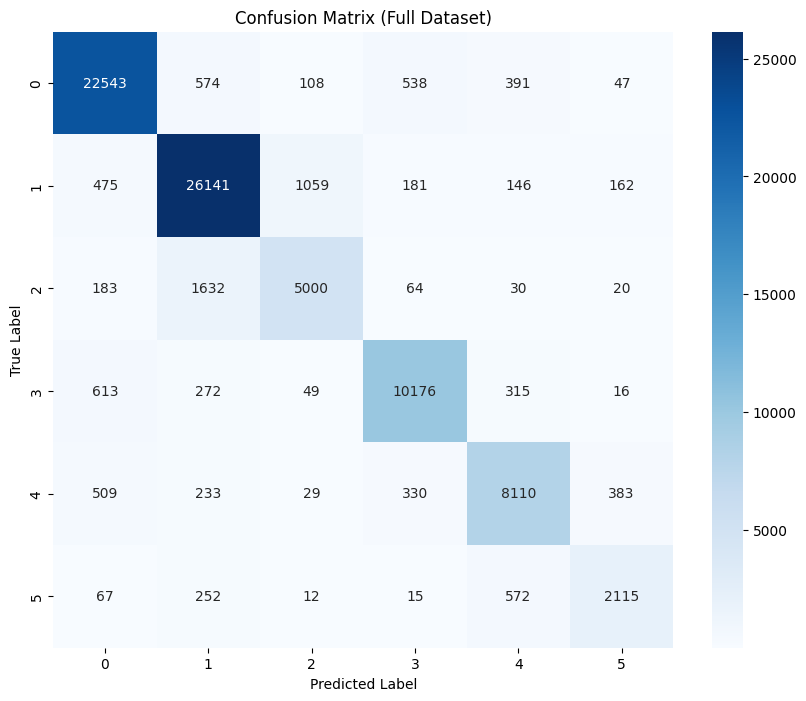

In [13]:
# Step 3: Train-Test Split on Full Dataset
from sklearn.model_selection import train_test_split

# Split the full dataset into training and testing sets
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, data['label'], test_size=0.2, random_state=42
)

print("Shape of X_train_full:", X_train_full.shape)
print("Shape of X_test_full:", X_test_full.shape)
print("Shape of y_train_full:", y_train_full.shape)
print("Shape of y_test_full:", y_test_full.shape)

# Step 4: Model Training on Full Dataset
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print("\nTraining Logistic Regression model on full dataset...")
# Initialize and train the Logistic Regression model
# Increased max_iter for convergence on potentially larger feature space
model_full = LogisticRegression(max_iter=2000)
model_full.fit(X_train_full, y_train_full)
print("Model training complete.")

# Step 5: Model Evaluation on Full Dataset
print("\nEvaluating model on full test set...")
# Make predictions on the test set
y_pred_full = model_full.predict(X_test_full)

# Evaluate the model
accuracy_full = accuracy_score(y_test_full, y_pred_full)
report_full = classification_report(y_test_full, y_pred_full)
conf_matrix_full = confusion_matrix(y_test_full, y_pred_full)

print("\nModel Evaluation on Full Dataset:")
print(f"Accuracy: {accuracy_full:.4f}")
print("\nClassification Report:")
print(report_full)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_full, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix (Full Dataset)')
plt.show()

## 3 ✅ **Step 6: Emoji Mapping and Prediction**


In [14]:
# Define the emoji mapping
emoji_map = {
    0: '😢', # sadness
    1: '😊', # joy
    2: '❤️', # love
    3: '😠', # anger
    4: '😨', # fear
    5: '😮'  # surprise
}

# Define a function to predict emotion and return emoji
def predict_emotion_emoji(tweet):
    # Clean the input tweet using the spaCy cleaning function
    cleaned_tweet = clean_text_spacy(tweet)

    # Vectorize the cleaned tweet using the fitted TF-IDF vectorizer
    # Use transform, not fit_transform, as the vectorizer is already fitted
    tweet_vector = tfidf_vectorizer_full.transform([cleaned_tweet])

    # Predict the emotion label using the trained model
    predicted_label = model_full.predict(tweet_vector)[0]

    # Get the corresponding emoji
    predicted_emoji = emoji_map.get(predicted_label, '❓') # Use '❓' for unknown labels

    # Get the emotion name (optional, for clarity)
    emotion_names = {v: k for k, v in emoji_map.items()} # Reverse mapping for names
    predicted_emotion_name = {
        0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'
    }.get(predicted_label, 'unknown')


    print(f"Original Tweet: {tweet}")
    print(f"Cleaned Tweet: {cleaned_tweet}")
    print(f"Predicted Label: {predicted_label} ({predicted_emotion_name})")
    print(f"Predicted Emoji: {predicted_emoji}")
    return predicted_emoji

# Example usage with a new tweet
new_tweet = "I am feeling very happy and excited about this project!"
predict_emotion_emoji(new_tweet)

new_tweet_2 = "This is making me so angry and frustrated."
predict_emotion_emoji(new_tweet_2)

new_tweet_3 = "I am a bit scared of what might happen."
predict_emotion_emoji(new_tweet_3)

Original Tweet: I am feeling very happy and excited about this project!
Cleaned Tweet: feel happy excited project
Predicted Label: 1 (joy)
Predicted Emoji: 😊
Original Tweet: This is making me so angry and frustrated.
Cleaned Tweet: make angry frustrated
Predicted Label: 3 (anger)
Predicted Emoji: 😠
Original Tweet: I am a bit scared of what might happen.
Cleaned Tweet: bit scared happen
Predicted Label: 4 (fear)
Predicted Emoji: 😨


'😨'

## 4 🛠️ Interactive Prediction Function


In [15]:
# Import necessary libraries
from ipywidgets import Textarea, Button, VBox, Output
from IPython.display import display

# Define the interactive function
def interactive_predict_emoji():
    print("Enter a tweet below and click 'Predict Emoji':")

    tweet_input = Textarea(
        value='',
        placeholder='Enter your tweet here...',
        description='Tweet:',
        disabled=False,
        layout={'width': 'auto'}
    )

    predict_button = Button(description='Predict Emoji')
    output_area = Output()

    def on_button_click(b):
        with output_area:
            output_area.clear_output()
            if tweet_input.value:
                predict_emotion_emoji(tweet_input.value)
            else:
                print("Please enter a tweet.")

    predict_button.on_click(on_button_click)

    display(VBox([tweet_input, predict_button, output_area]))

# Run the interactive function
interactive_predict_emoji()

Enter a tweet below and click 'Predict Emoji':
